### **Note :**
* You will need the below 3 datasets to work on the questions : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [106]:
import pandas as pd
import numpy as np

In [107]:
matches=pd.read_csv('ipl_matches.csv')

In [108]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5


#### a) Display data-type of each column

In [109]:
matches.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

#### b) Define granularity for the dataset ipl_matches

##### The dataset provides us match-wise data so we can go as deep as a single match in a record and hence a single match record determines  the granularity of the dataset

#### c) Write code to create a primary key as a new column for the dataset

    1. Convert match_date into the format YYYYMMDD
    2. Depending upon whether the given match is the 1st of 2nd for the day, append a string 01 or 02 to the end
    
    Ex. if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like 2009041801 and second match as 2009041802


In [110]:
matches.columns

Index(['match_date', 'Ground', 'Team 1', 'Team 2', 'Winner', 'year', 'month',
       'day', 'win_mode', 'margin', 'toss_winner', 'toss_decision',
       'match_no'],
      dtype='object')

In [111]:
matches['match_date'][0]

'2008-04-18'

In [112]:
primary=matches['match_date']

In [113]:
primary=list(primary)

In [114]:
for i in range(len(primary)):
    primary[i]=primary[i].replace('-','')

In [115]:
primary[0]=primary[0]+'01'

In [116]:
for i in range(1,len(primary)):
    if(primary[i]==primary[i-1]):
        primary[i]=primary[i]+"02"
    else:
        primary[i]=primary[i]+"01"

In [117]:
matches['primary']=primary

In [118]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,primary
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041901
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042001


### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

#### a) Write code to find out % matches by team (across all seasons) where they won the toss
#### b) What % of matches which the teams won the toss also ended up winning the matches?

In [119]:
matches['tw']=matches['toss_winner']==matches['Team 1']

In [120]:
matches.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,primary,tw
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801,True
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901,False
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041901,False
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001,False
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042001,True


In [121]:
g1=matches[['Team 1','primary','tw']].groupby(['Team 1','tw']).agg(['count'])
g2=matches[['Team 2','primary','tw']].groupby(['Team 2','tw']).agg(['count'])

In [122]:
A=dict()
team=[]
ww=[]
wl=[]
lw=[]
ll=[]
i=0
for name,group in g1.iterrows():
    if name[1]==False:
        wl.append(group[0])
    else:
        ww.append(group[0])
    if(i%2==0):
        team.append(name[0])
    i+=1
        
for name,group in g2.iterrows():
    if name[1]==False:
        ll.append(group[0])
    else:
        lw.append(group[0])

A['Team']=team
A['Win match-win toss']=ww
A['Win match-lost toss']=wl
A['Lose match-win toss']=lw
A['Lose match-lost toss']=ll

df=pd.DataFrame(A)

In [123]:
df

,Team,Win match-win toss,Win match-lost toss,Lose match-win toss,Lose match-lost toss
0,Chennai Super Kings,49,42,35,40
1,Deccan Chargers,22,17,15,22
2,Delhi Capitals,44,48,39,47
3,Gujarat Lions,7,9,6,8
4,Kings XI Punjab,39,48,47,41
5,Kochi Tuskers Kerala,4,3,3,4
6,Kolkata Knight Riders,43,44,43,51
7,Mumbai Indians,47,40,50,51
8,Pune Warriors,10,13,13,10
9,Rajasthan Royals,31,35,32,52


In [124]:
df['total']=df['Win match-win toss']+df['Win match-lost toss']+df['Lose match-win toss']+df['Lose match-lost toss']

In [125]:
df['toss %']=(df['Win match-win toss']+df['Lose match-win toss'])*100/df['total']

In [126]:
df

,Team,Win match-win toss,Win match-lost toss,Lose match-win toss,Lose match-lost toss,total,toss %
0,Chennai Super Kings,49,42,35,40,166,50.602410
1,Deccan Chargers,22,17,15,22,76,48.684211
2,Delhi Capitals,44,48,39,47,178,46.629213
3,Gujarat Lions,7,9,6,8,30,43.333333
4,Kings XI Punjab,39,48,47,41,175,49.142857
5,Kochi Tuskers Kerala,4,3,3,4,14,50.000000
6,Kolkata Knight Riders,43,44,43,51,181,47.513812
7,Mumbai Indians,47,40,50,51,188,51.595745
8,Pune Warriors,10,13,13,10,46,50.000000
9,Rajasthan Royals,31,35,32,52,150,42.000000


In [127]:
df['tw %']=df['Win match-win toss']*100/(df['Win match-win toss']+df['Lose match-win toss'])

In [128]:
df

,Team,Win match-win toss,Win match-lost toss,Lose match-win toss,Lose match-lost toss,total,toss %,tw %
0,Chennai Super Kings,49,42,35,40,166,50.602410,58.333333
1,Deccan Chargers,22,17,15,22,76,48.684211,59.459459
2,Delhi Capitals,44,48,39,47,178,46.629213,53.012048
3,Gujarat Lions,7,9,6,8,30,43.333333,53.846154
4,Kings XI Punjab,39,48,47,41,175,49.142857,45.348837
5,Kochi Tuskers Kerala,4,3,3,4,14,50.000000,57.142857
6,Kolkata Knight Riders,43,44,43,51,181,47.513812,50.000000
7,Mumbai Indians,47,40,50,51,188,51.595745,48.453608
8,Pune Warriors,10,13,13,10,46,50.000000,43.478261
9,Rajasthan Royals,31,35,32,52,150,42.000000,49.206349


**match_played** - Total Matches played

**toss_won** - Matches in which the team won the toss

**toss_and_match_won** - Matches in which the team won the toss as well as the match

**percent_toss_won** - percentage of matches in which the team won the toss

**percent_toss_and_match_won** - percentage of matches in which the team won the toss as well as the match (wrt to matches in which the team won the toss)

**percent_toss_and_match_won_matches** - percentage of matches in which the team won the toss as well as the match (wrt to total macthes played)

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



a) List the names of the **top 10 batsmen** by total runs accumulated across all the seasons

In [129]:
# write your code here. Feel free to add multiple cells as per your need
bat = pd.read_csv('ipl_batting.csv')

In [130]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801


In [131]:
b=bat[['batsmen','R']].groupby('batsmen').agg('sum').sort_values(by=['R'],ascending=False)

In [132]:
b.head(10)

,R
batsmen,
V Kohli,5412
SK Raina,5368
RG Sharma,4898
DA Warner,4706
S Dhawan,4579
CH Gayle,4484
MS Dhoni,4432
RV Uthappa,4411
AB de Villiers,4395


### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

In [133]:
# write your code here. Feel free to add multiple cells as per your need
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801


In [134]:
b=bat[bat['match_date'].str[6:]=='2017']

In [135]:
b.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key
6962,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,c Mandeep Singh b Choudhary,14,8,10,2,1,175.00,captain,05-04-2017,2017040501
6963,1,Sunrisers Hyderabad,Royal Challengers Bangalore,S Dhawan,c Sachin Baby b Binny,40,31,51,5,0,129.03,normal player,05-04-2017,2017040501
6964,1,Sunrisers Hyderabad,Royal Challengers Bangalore,MC Henriques,c Sachin Baby b Chahal,52,37,67,3,2,140.54,normal player,05-04-2017,2017040501
6965,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Yuvraj Singh,b Mills,62,27,49,7,3,229.62,normal player,05-04-2017,2017040501
6966,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DJ Hooda,not out,16,12,29,0,1,133.33,normal player,05-04-2017,2017040501


In [136]:
b=b[['batsmen','R','B']].groupby(['batsmen']).agg('sum')

In [137]:
b

,R,B
batsmen,,
A Choudhary,25,20
A Mishra,49,52
A Nehra,0,0
A Zampa,5,7
AB Dinda,7,7
...,...,...
Washington Sundar,9,12
YK Pathan,143,115
YS Chahal,13,26


In [138]:
import seaborn as sns


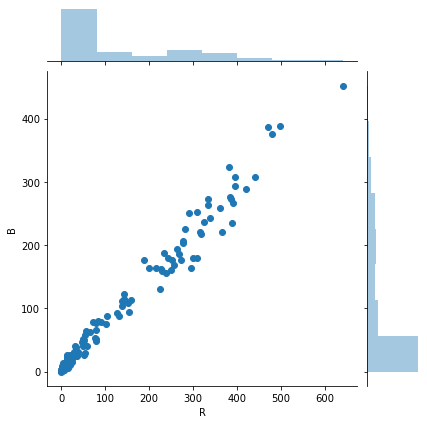

In [139]:
sns.jointplot(b['R'],b['B'])

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

 Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**

Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman


#### Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

In [140]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801


In [141]:
bat["boundary_contribution"] = (bat['fours']*4+bat['sixes']*6)*100/bat['R']
bat

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,76.923077
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,47.457627
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,36.363636
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,44.444444
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,80.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11541,Final (N),Chennai Super Kings,Rajasthan Royals,YK Pathan,run out (Raina),56,39,0,3,4,143.58,normal player,01-06-2008,2008060101,64.285714
11542,Final (N),Chennai Super Kings,Rajasthan Royals,M Kaif,c Dhoni b Muralitharan,12,9,0,0,1,133.33,normal player,01-06-2008,2008060101,50.000000
11543,Final (N),Chennai Super Kings,Rajasthan Royals,RA Jadeja,c Kapugedera b Morkel,0,1,0,0,0,0.00,normal player,01-06-2008,2008060101,NaN
11544,Final (N),Chennai Super Kings,Rajasthan Royals,SK Warne,not out,9,9,0,1,0,100.00,captain,01-06-2008,2008060101,44.444444


In [142]:
import matplotlib.pyplot as plt

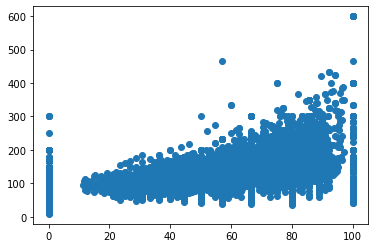

In [143]:
fig = plt.scatter(x=bat['boundary_contribution'], y=bat['SR'])

In [144]:
bound_contri = bat.groupby('batsmen')
bc = bound_contri["boundary_contribution"].mean()

In [39]:
bc.sort_values(ascending=False)[:10]

batsmen
P Chopra        100.000000
BA Bhatt        100.000000
VRV Singh       100.000000
GD McGrath      100.000000
RS Sodhi        100.000000
Avesh Khan      100.000000
NJ Maddinson     88.888889
MDKJ Perera      85.714286
Ankit Soni       85.714286
ER Dwivedi       82.105263
Name: boundary_contribution, dtype: float64

### **Question 6**
* List down **top 10** batsmen by **strike_rate** across all seasons. Plot the top 10 batsmen on a **bar chart**
* Repeat the above task for **bottom 10** batsmen
* Create a sub-plot with three sections. Show the below visuals in each : 
  * Box plot of **strike rates** of the top 10 batsmen listed in 1st part of the question
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen
----------------------------------

In [145]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,76.923077
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,47.457627
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,36.363636
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,44.444444
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,80.000000


In [146]:
len(bat.batsmen.unique())

518

In [147]:
bat[['batsmen','SR']].groupby('batsmen').agg('mean').sort_values(by=['SR'],ascending=False).head(10)

,SR
batsmen,
JPR Scantlebury-Searles,320.000000
B Stanlake,250.000000
DT Patil,237.500000
MJ Santner,221.665000
RS Sodhi,200.000000
Umar Gul,198.295000
AN Ahmed,190.933333
I Malhotra,175.000000
Harpreet Brar,166.660000


In [148]:
b=bat[['batsmen','R','B']].groupby('batsmen').agg(['sum'])

In [149]:
b['SR']=b['R']*100/b['B']

In [150]:
b1=b.sort_values(by=['SR'],ascending=False).head(10)

In [151]:
bats=b1.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this


<BarContainer object of 10 artists>

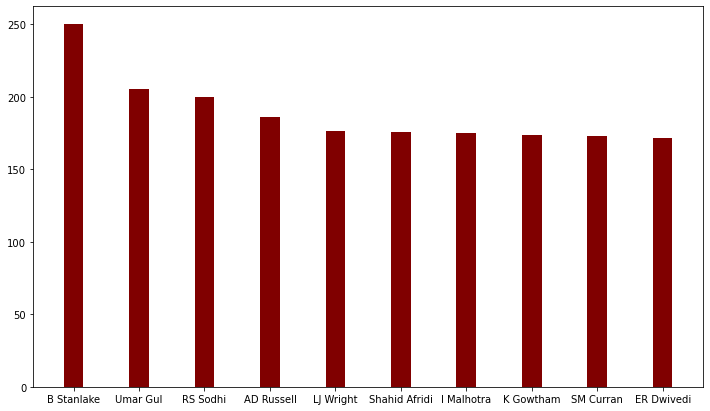

In [152]:
fig = plt.figure(figsize =(12, 7)) 

plt.bar(bats, b1['SR'], color ='maroon',  
        width = 0.3) 

In [153]:
b2=b.sort_values(by=['SR']).head(10)

<BarContainer object of 10 artists>

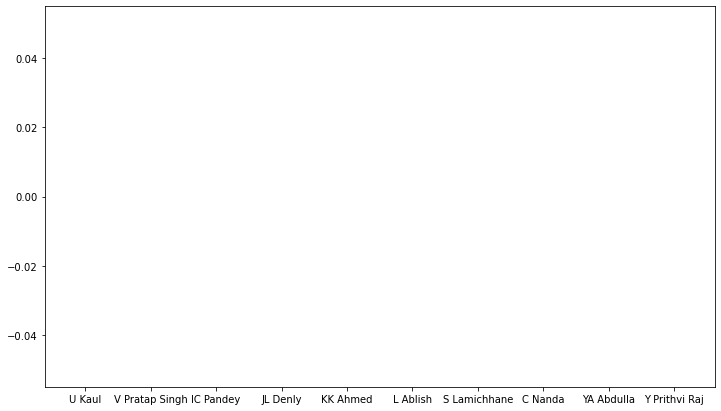

In [154]:
bats=b2.index.values.tolist()  # an ndarray method, you probably shouldn't depend on this
fig = plt.figure(figsize =(12, 7)) 

plt.bar(bats, b2['SR'], color ='maroon',  
        width = 0.3) 

In [155]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=1, cols=3)

bat_grp = bat.groupby("batsmen")
bc_bat_grp = bat_grp["boundary_contribution"].mean()

bc_bat_grp = bc_bat_grp.sort_values(ascending = False)

fig.add_trace(
    go.Bar(x=SR_mean.index[-10:], y=SR_mean[-10:]),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=SR_mean.sort_values(ascending = True).index[:10], y=SR_mean.sort_values(ascending = True)[:10]),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=bc_bat_grp.index[:10], y=bc_bat_grp[:10]),
    row=1, col=3
)

fig.update_layout(height=600, width=800, title_text="1. Top 10 by Strike Rate // 2. Bottom 10 by Strike Rate // 3. Top 10 by Boundary Contribtn")
fig.show()

ModuleNotFoundError: No module named 'plotly'

### **Question 7**
* Create a new column called **dismissal_status**. Use the wicket_status column to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**
* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**
* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0
* Create a **count plot** of player dismissals across the categories calculated above. Which category stands out from the rest?
------------------


In [ ]:
batcopy = bat

### Dropped  dismissal_status, bowler_name, fielder_name,fielder_involved.

In [156]:
batcopy = batcopy.drop(["dismissal_mode","bowler_name","fielder","is_fielder_involved"],axis = 1)

NameError: name 'batcopy' is not defined

In [157]:
batcopy.head()

NameError: name 'batcopy' is not defined

In [158]:
dismissalMode = []
bowlerName = []
fielderName = []
fielderInvolved = []

for i,j in batcopy.iterrows():
    dmode = j["wicket_status"].split(" ")
    
    if dmode[0] == "c":
        #1
        dismissalMode.append("caught")
        #2
        bi = dmode.index("b")
        bowlerName.append(" ".join(dmode[bi+1:]))
        #3
        if dmode[1] != "&":
            fielderName.append(" ".join(dmode[1:bi]))
        else:
            fielderName.append(" ".join(dmode[bi+1:]))
        #4
        fielderInvolved.append(1)
    elif dmode[0] == "not":
        #1
        dismissalMode.append("not out")
        #2
        bowlerName.append("no bowler")
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
        
    elif dmode[0] == "run":
        #1
        dismissalMode.append("run out")
        #2
        bowlerName.append("no bowler")
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    elif dmode[0] == "b":
        #1
        dismissalMode.append("bowled")
        #2
        bi = dmode.index("b")
        bowlerName.append(" ".join(dmode[bi+1:]))
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    elif dmode[0] == "lbw":
        #1
        dismissalMode.append("lbw")
        #2
        bi = dmode.index("b")
        bowlerName.append(" ".join(dmode[bi+1:]))
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    elif dmode[0] == "retired":
        #1
        dismissalMode.append("retired")
        #2
        bowlerName.append("no bowler")
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    elif dmode[0] == "st":
        #1
        dismissalMode.append("stumped")
        #2
        bi = dmode.index("b")
        bowlerName.append(" ".join(dmode[bi+1:]))
        #3
        fielderName.append(" ".join(dmode[1:bi]))
        #4
        fielderInvolved.append(1)
    elif dmode[0] == "absent":
        #1
        dismissalMode.append("absent hurt")
        #2
        bowlerName.append("no bowler")
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)   
    elif dmode[0] == "hit":
        #1
        dismissalMode.append("hit wicket")
        #2
        bi = dmode.index("b")
        bowlerName.append(" ".join(dmode[bi+1:]))
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    elif dmode[0] == "obstructing":
        #1
        dismissalMode.append("Obstructing the field")
        #2
        bowlerName.append("no bowler")
        #3
        fielderName.append("no fielder")
        #4
        fielderInvolved.append(0)
    else:
        print("Error")

NameError: name 'batcopy' is not defined

In [ ]:
print(set(dismissalMode))

{'bowled', 'caught', 'Obstructing the field', 'hit wicket', 'not out', 'run out', 'stumped', 'absent hurt', 'lbw', 'retired'}


In [ ]:
dismissalMode = pd.Series(dismissalMode)
bowlerName = pd.Series(bowlerName)
fielderName = pd.Series(fielderName)
fielderInvolved = pd.Series(fielderInvolved)

In [ ]:
batcopy["dismissal_mode"] = dismissalMode
batcopy["bowler_name"] = bowlerName
batcopy["fielder"] = fielderName
batcopy["is_fielder_involved"] = fielderInvolved

In [ ]:
bat = batcopy

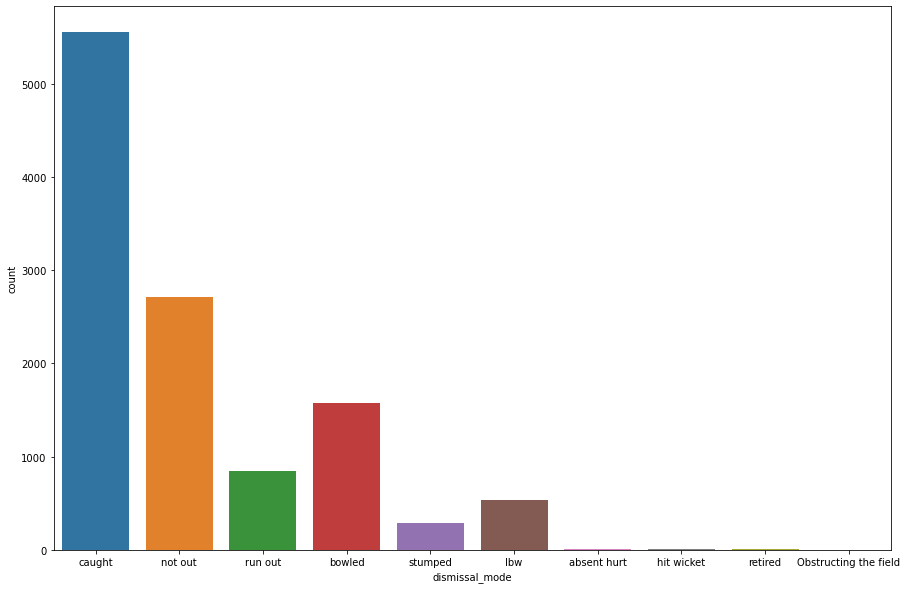

In [ ]:
from matplotlib import pyplot

a4_dims = (15, 10)

fig, ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax=ax, x=bat["dismissal_mode"])

In [ ]:
dm = bat.groupby('dismissal_mode')
dm = dm['dismissal_mode'].count()

print(dm)
px.bar(x = dm.index,y = dm)

dismissal_mode
Obstructing the field       2
absent hurt                 6
bowled                   1578
caught                   5552
hit wicket                 10
lbw                       540
not out                  2713
retired                    11
run out                   850
stumped                   284
Name: dismissal_mode, dtype: int64


### **Question 8**
* Create a dataframe at a player level. Calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average
* Assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons
------------------


In [ ]:
# write your code here. Feel free to add multiple cells as per your need

batsman = pd.DataFrame(["batsman","#50s","#100s","#4s","#6s","Average"])

In [ ]:
fifs = defaultdict(lambda :0)
cents = defaultdict(lambda :0)
fours = defaultdict(lambda :0)
sixes = defaultdict(lambda :0)
runs = defaultdict(lambda :0)
outs = defaultdict(lambda :0)


for i,batsman in bat.iterrows():
    fifs[batsman["batsmen"]] += (1 if (batsman["R"] >= 50 and batsman["R"] < 100) else 0)
    cents[batsman["batsmen"]] += (1 if (batsman["R"] >= 100) else 0)
    fours[batsman["batsmen"]] += batsman["fours"]
    sixes[batsman["batsmen"]] += batsman["sixes"]
    
    runs[batsman["batsmen"]] += batsman["R"]
    outs[batsman["batsmen"]] += (1 if batsman["dismissal_mode"] != "not out" else 0)
                                  

#### Average Calculation :

If Total Outs != 0

    avg = Total Runs Scored/Total Outs
Else

    avg = Total Runs

In [ ]:
batsman = pd.DataFrame(columns = ["batsman","#50s","#100s","#4s","#6s","Average"])


for k,v in runs.items():
    batsman.loc[len(batsman)] = [k,fifs[k],cents[k],fours[k],sixes[k],runs[k]/outs[k] if (outs[k] > 0) else runs[k]]

In [ ]:
batsman.head()

,batsman,#50s,#100s,#4s,#6s,Average
0,ST Jayasuriya,4,1,84,39,27.428571
1,SR Tendulkar,13,1,295,29,33.826087
2,S Dhawan,37,0,524,96,33.181159
3,JP Duminy,14,0,126,79,39.784314
4,DJ Bravo,5,0,117,61,23.171875


In [ ]:
batsman["points"] = batsman["#50s"]*5 + batsman["#100s"]*10 + batsman["#4s"]*2 + batsman["#6s"]*4 

In [ ]:
points = []
for i in range(len(batsman)):
    points.append(batsman.iloc[i]["points"] + (20 if batsman.iloc[i]["Average"] > 30 else 10))

final_points = pd.Series(points)

batsman.drop("points",inplace = True,axis = 1)
batsman["points"] = final_points


In [ ]:
batsman.head()

,batsman,#50s,#100s,#4s,#6s,Average,points
0,ST Jayasuriya,4,1,84,39,27.428571,364
1,SR Tendulkar,13,1,295,29,33.826087,801
2,S Dhawan,37,0,524,96,33.181159,1637
3,JP Duminy,14,0,126,79,39.784314,658
4,DJ Bravo,5,0,117,61,23.171875,513


In [ ]:
batsman = batsman.sort_values(by = "points",ascending=False)

In [ ]:
batsman.head(10)

,batsman,#50s,#100s,#4s,#6s,Average,points
50,CH Gayle,28,6,368,326,41.137615,2260
11,SK Raina,38,1,493,194,33.341615,1982
23,V Kohli,36,5,480,190,37.846154,1970
120,DA Warner,44,4,458,181,43.174312,1920
63,RG Sharma,36,1,431,194,31.600000,1848
73,AB de Villiers,33,3,357,212,39.954545,1777
2,S Dhawan,37,0,524,96,33.181159,1637
19,RV Uthappa,24,0,435,156,28.830065,1624
13,MS Dhoni,23,0,297,209,42.209524,1565
181,SR Watson,19,4,343,177,31.086957,1549


In [ ]:
px.bar(batsman[:10],x = "batsman",y = "points")

### **Question 9**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2017**) and plot a **box and whiskers plot** of **%run_contribution** per captain
  * Which captain do you think has played **captain's knock** most of the times? (purely going by % contribution to scorecard for now)
------------------


In [247]:
balls = pd.read_csv("ipl_deliveries.csv")
balls.shape

(150460, 18)

In [248]:
balls.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
1,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN,980953.yaml
2,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN,980953.yaml
3,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
4,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml


In [249]:
bat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,76.923077
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,47.457627
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,36.363636
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,44.444444
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,80.000000


In [250]:
balls=balls[(balls['Match_id']<2018000000) & (balls['Match_id']>2017000000 )]

In [251]:
balls.Batsman.unique().shape

(143,)

In [252]:
balls.shape

(13862, 18)

In [257]:
balls[balls['Batsman']=='V Kohli']['Match_id'].unique().shape

(10,)

In [258]:
mapping=balls[['Batsman','Team']].groupby(['Team','Batsman']).count().reset_index()

In [259]:
mapping

,Team,Batsman
0,Delhi Daredevils,A Mishra
1,Delhi Daredevils,AD Mathews
2,Delhi Daredevils,AP Tare
3,Delhi Daredevils,AR Bawne
4,Delhi Daredevils,CH Morris
...,...,...
138,Sunrisers Hyderabad,Rashid Khan
139,Sunrisers Hyderabad,S Dhawan
140,Sunrisers Hyderabad,S Kaul
141,Sunrisers Hyderabad,V Shankar


In [260]:
A=dict()

In [261]:
for index,row in mapping.iterrows():
    A[row['Batsman']]=row['Team']

In [262]:
A['G Gambhir']

'Kolkata Knight Riders'

In [263]:
b=bat[bat['match_date'].str[6:]=='2017']

In [264]:
b.shape

(914, 15)

In [265]:
mapping

,Team,Batsman
0,Delhi Daredevils,A Mishra
1,Delhi Daredevils,AD Mathews
2,Delhi Daredevils,AP Tare
3,Delhi Daredevils,AR Bawne
4,Delhi Daredevils,CH Morris
...,...,...
138,Sunrisers Hyderabad,Rashid Khan
139,Sunrisers Hyderabad,S Dhawan
140,Sunrisers Hyderabad,S Kaul
141,Sunrisers Hyderabad,V Shankar


In [266]:
mapping.rename(columns = {'Batsman':'batsmen'}, inplace = True) 

In [267]:
s=pd.merge(b, mapping, on='batsmen')

In [268]:
s.batsmen.unique().shape

(143,)

In [269]:
a=b.batsmen.unique()

In [270]:
for i in a:
    if(i not in A):
        print(i)

A Nehra


In [271]:
b[b['batsmen']=='A Nehra']

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution
7100,10th match (N),Sunrisers Hyderabad,Mumbai Indians,A Nehra,not out,0,0,1,0,0,0.0,normal player,12-04-2017,2017041201,NaN
7629,44th match (D/N),Rising Pune Supergiant,Sunrisers Hyderabad,A Nehra,not out,0,0,1,0,0,0.0,normal player,06-05-2017,2017050601,NaN


In [272]:
tot_runs=s[['R','batsmen','Team']].groupby('Team').agg('sum').reset_index()
tot_runs

,Team,R
0,Delhi Daredevils,2131
1,Gujarat Lions,2309
2,Kings XI Punjab,2099
3,Kolkata Knight Riders,2354
4,Mumbai Indians,2622
5,Rising Pune Supergiant,2370
6,Royal Challengers Bangalore,1760
7,Sunrisers Hyderabad,2262


In [273]:
caps=s[s['special_role']=='captain']
caps

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution,Team
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,c Mandeep Singh b Choudhary,14,8,10,2,1,175.00,captain,05-04-2017,2017040501,100.000000,Sunrisers Hyderabad
1,6th match (D/N),Gujarat Lions,Sunrisers Hyderabad,DA Warner,not out,76,45,70,6,4,168.88,captain,09-04-2017,2017040901,63.157895,Sunrisers Hyderabad
2,10th match (N),Sunrisers Hyderabad,Mumbai Indians,DA Warner,c †Patel b Harbhajan Singh,49,34,53,7,2,144.11,captain,12-04-2017,2017041201,81.632653,Sunrisers Hyderabad
3,14th match (D/N),Kolkata Knight Riders,Sunrisers Hyderabad,DA Warner,c Woakes b Kuldeep Yadav,26,30,42,4,0,86.66,captain,15-04-2017,2017041501,61.538462,Sunrisers Hyderabad
4,19th match (N),Sunrisers Hyderabad,Kings XI Punjab,DA Warner,not out,70,54,98,7,2,129.62,captain,17-04-2017,2017041702,57.142857,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,34th match (D/N),Rising Pune Supergiant,Royal Challengers Bangalore,V Kohli,c sub (MA Agarwal) b Christian,55,48,87,4,1,114.58,captain,29-04-2017,2017042901,40.000000,Royal Challengers Bangalore
730,38th match (D/N),Royal Challengers Bangalore,Mumbai Indians,V Kohli,c RG Sharma b McClenaghan,20,14,24,0,2,142.85,captain,01-05-2017,2017050101,60.000000,Royal Challengers Bangalore
731,43rd match (N),Kings XI Punjab,Royal Challengers Bangalore,V Kohli,b Sandeep Sharma,6,6,8,1,0,100.00,captain,05-05-2017,2017050501,66.666667,Royal Challengers Bangalore
732,46th match (D/N),Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,lbw b Yadav,5,9,11,0,0,55.55,captain,07-05-2017,2017050701,0.000000,Royal Challengers Bangalore


In [274]:
caps[caps['batsmen']=='V Kohli'].shape

(10, 16)

In [275]:
caps.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution,Team
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,c Mandeep Singh b Choudhary,14,8,10,2,1,175.00,captain,05-04-2017,2017040501,100.000000,Sunrisers Hyderabad
1,6th match (D/N),Gujarat Lions,Sunrisers Hyderabad,DA Warner,not out,76,45,70,6,4,168.88,captain,09-04-2017,2017040901,63.157895,Sunrisers Hyderabad
2,10th match (N),Sunrisers Hyderabad,Mumbai Indians,DA Warner,c †Patel b Harbhajan Singh,49,34,53,7,2,144.11,captain,12-04-2017,2017041201,81.632653,Sunrisers Hyderabad
3,14th match (D/N),Kolkata Knight Riders,Sunrisers Hyderabad,DA Warner,c Woakes b Kuldeep Yadav,26,30,42,4,0,86.66,captain,15-04-2017,2017041501,61.538462,Sunrisers Hyderabad
4,19th match (N),Sunrisers Hyderabad,Kings XI Punjab,DA Warner,not out,70,54,98,7,2,129.62,captain,17-04-2017,2017041702,57.142857,Sunrisers Hyderabad


In [277]:
cap_runs=caps[['R','batsmen','Team']].groupby(['batsmen','Team'""]).agg('sum').reset_index()
cap_runs

,batsmen,Team,R
0,AM Rahane,Rising Pune Supergiant,10
1,DA Warner,Sunrisers Hyderabad,641
2,G Gambhir,Kolkata Knight Riders,498
3,GJ Maxwell,Kings XI Punjab,310
4,KK Nair,Delhi Daredevils,62
5,RG Sharma,Mumbai Indians,333
6,SK Raina,Gujarat Lions,442
7,SPD Smith,Rising Pune Supergiant,472
8,SR Watson,Royal Challengers Bangalore,47
9,V Kohli,Royal Challengers Bangalore,308


In [182]:
final=pd.merge(cap_runs, tot_runs, on='Team')
final

,batsmen,Team,R_x,R_y
0,AM Rahane,Rising Pune Supergiant,10,2370
1,SPD Smith,Rising Pune Supergiant,472,2370
2,DA Warner,Sunrisers Hyderabad,641,2262
3,G Gambhir,Kolkata Knight Riders,498,2354
4,GJ Maxwell,Kings XI Punjab,310,2099
5,KK Nair,Delhi Daredevils,62,2131
6,Z Khan,Delhi Daredevils,4,2131
7,RG Sharma,Mumbai Indians,333,2622
8,SK Raina,Gujarat Lions,442,2309
9,SR Watson,Royal Challengers Bangalore,47,1760


In [183]:
final['perc']=final['R_x']*100/final['R_y']
final.sort_values(by=['perc'],ascending=False)

,batsmen,Team,R_x,R_y,perc
2,DA Warner,Sunrisers Hyderabad,641,2262,28.337754
3,G Gambhir,Kolkata Knight Riders,498,2354,21.155480
1,SPD Smith,Rising Pune Supergiant,472,2370,19.915612
8,SK Raina,Gujarat Lions,442,2309,19.142486
10,V Kohli,Royal Challengers Bangalore,308,1760,17.500000
4,GJ Maxwell,Kings XI Punjab,310,2099,14.768938
7,RG Sharma,Mumbai Indians,333,2622,12.700229
5,KK Nair,Delhi Daredevils,62,2131,2.909432
9,SR Watson,Royal Challengers Bangalore,47,1760,2.670455
0,AM Rahane,Rising Pune Supergiant,10,2370,0.421941


In [288]:
runs=s[['R','batsmen','Team','match_key']].groupby(['Team','match_key']).agg('sum').reset_index()
runs

,Team,match_key,R
0,Delhi Daredevils,2017040802,137
1,Delhi Daredevils,2017041101,197
2,Delhi Daredevils,2017041502,178
3,Delhi Daredevils,2017041701,165
4,Delhi Daredevils,2017041901,169
...,...,...,...
113,Sunrisers Hyderabad,2017050201,177
114,Sunrisers Hyderabad,2017050601,134
115,Sunrisers Hyderabad,2017050801,136
116,Sunrisers Hyderabad,2017051301,154


In [290]:
c_runs=caps[['R','batsmen','Team','match_key']].groupby(['Team','match_key','batsmen']).agg('sum').reset_index()
c_runs

,Team,match_key,batsmen,R
0,Delhi Daredevils,2017040802,Z Khan,1
1,Delhi Daredevils,2017043001,KK Nair,11
2,Delhi Daredevils,2017050201,KK Nair,39
3,Delhi Daredevils,2017050401,KK Nair,12
4,Delhi Daredevils,2017050602,Z Khan,2
...,...,...,...,...
103,Sunrisers Hyderabad,2017050201,DA Warner,30
104,Sunrisers Hyderabad,2017050601,DA Warner,40
105,Sunrisers Hyderabad,2017050801,DA Warner,6
106,Sunrisers Hyderabad,2017051301,DA Warner,69


In [294]:
f=pd.merge(c_runs, runs, on=['Team','match_key'])
f['perc']=f['R_x']*100/f['R_y']
f

,Team,match_key,batsmen,R_x,R_y,perc
0,Delhi Daredevils,2017040802,Z Khan,1,137,0.729927
1,Delhi Daredevils,2017043001,KK Nair,11,62,17.741935
2,Delhi Daredevils,2017050201,KK Nair,39,186,20.967742
3,Delhi Daredevils,2017050401,KK Nair,12,202,5.940594
4,Delhi Daredevils,2017050602,Z Khan,2,63,3.174603
...,...,...,...,...,...,...
103,Sunrisers Hyderabad,2017050201,DA Warner,30,177,16.949153
104,Sunrisers Hyderabad,2017050601,DA Warner,40,134,29.850746
105,Sunrisers Hyderabad,2017050801,DA Warner,6,136,4.411765
106,Sunrisers Hyderabad,2017051301,DA Warner,69,154,44.805195


### **Question 10**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in per innings and the **run_rate** of the innings
* Create a **histogram** of **total_runs** by innings. What kind of a **distribution** your discover?
* **Repeat** the above step for **run_rate** per innings too
* Is the distribution **left skewed** or **right skewed**?
* Discuss your insights

------------------

In [321]:
balls = pd.read_csv("ipl_deliveries.csv")
balls.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name
0,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.1,DA Warner,KW Richardson,S Dhawan,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
1,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.2,DA Warner,KW Richardson,S Dhawan,4,0,NaN,4,NaN,NaN,NaN,980953.yaml
2,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.3,DA Warner,KW Richardson,S Dhawan,1,0,NaN,1,NaN,NaN,NaN,980953.yaml
3,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.4,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml
4,2016043001,Hyderabad,1,Sunrisers Hyderabad,Sunrisers Hyderabad,1,0.5,S Dhawan,KW Richardson,DA Warner,0,0,NaN,0,NaN,NaN,NaN,980953.yaml


In [330]:
balls[balls['Match_id']==2017040801].Innings.unique()

array([1, 2], dtype=int64)

In [340]:
runs=balls[['Match_id','Innings','Runs_total','Team']].groupby(['Match_id','Innings','Team']).agg(['sum','count']).reset_index()
runs.shape
runs

Match_id Innings                         Team Runs_total      
                                                             sum count
0     2008041801       1        Kolkata Knight Riders        222   124
1     2008041801       2  Royal Challengers Bangalore         82   101
2     2008041901       1          Chennai Super Kings        240   124
3     2008041901       2              Kings XI Punjab        207   124
4     2008041902       1             Rajasthan Royals        129   122
...          ...     ...                          ...        ...   ...
1272  2017051701       2        Kolkata Knight Riders         48    35
1273  2017051901       1        Kolkata Knight Riders        107   116
1274  2017051901       2               Mumbai Indians        111    91
1275  2017052101       1               Mumbai Indians        129   125
1276  2017052101       2       Rising Pune Supergiant        128   123

[1277 rows x 5 columns]

In [341]:
runs['Runs_total'].describe()

,sum,count
count,1277.000000,1277.000000
mean,152.164448,117.823023
std,32.821254,15.967885
min,2.000000,4.000000
25%,134.000000,119.000000
50%,154.000000,123.000000
75%,173.000000,125.000000
max,263.000000,137.000000


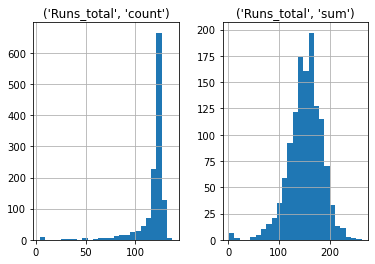

In [342]:
hist=runs.hist(column='Runs_total',bins=25)

In [343]:
runs['ovs']=runs[('Runs_total',   'count')]/6
runs['ovs'].head()
runs['rr']=runs[('Runs_total',   'sum')]/runs['ovs']
runs.head()

Match_id Innings                         Team Runs_total        \
                                                          sum count   
0  2008041801       1        Kolkata Knight Riders        222   124   
1  2008041801       2  Royal Challengers Bangalore         82   101   
2  2008041901       1          Chennai Super Kings        240   124   
3  2008041901       2              Kings XI Punjab        207   124   
4  2008041902       1             Rajasthan Royals        129   122   

         ovs         rr  
                         
0  20.666667  10.741935  
1  16.833333   4.871287  
2  20.666667  11.612903  
3  20.666667  10.016129  
4  20.333333   6.344262

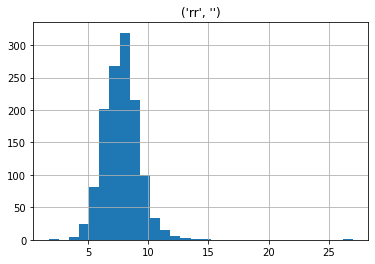

In [344]:
hist=runs.hist(column='rr',bins=30)

### **Question 11**
* **Filter** the histogram (created in **Question 10**) for an **IPL season**. Ex. IPL 2016
* Also, filter the histogram for a **team** within a **season**. Ex. for CSK within IPL 2016
* **Describe** your observations. Think along the following **questions** : 
  * What is the meaning of **skewness**?
  * Is there an **observable difference** between the **rate of runs** scored for some teams over others?
    * Choose appropriate **visualization** to understand **run_rate** of teams (**Hint :** Violin charts)
    * Which teams are strong at making **large quantity** of runs?
    * Which teams are strong at making runs at a **quicker rate**? (Consider run a ball the **base line** for **under** or **over** indexing teams)

* **Note :** *A metric is said to be under-indexed when it's value is less than the baseline value. Similarly it is said to be over-indexed when it's value is more than the baseline value*

-------------------------
    

In [345]:
runs['Match_id']=runs['Match_id'].astype(str) 
runs.head()

Match_id Innings                         Team Runs_total        \
                                                          sum count   
0  2008041801       1        Kolkata Knight Riders        222   124   
1  2008041801       2  Royal Challengers Bangalore         82   101   
2  2008041901       1          Chennai Super Kings        240   124   
3  2008041901       2              Kings XI Punjab        207   124   
4  2008041902       1             Rajasthan Royals        129   122   

         ovs         rr  
                         
0  20.666667  10.741935  
1  16.833333   4.871287  
2  20.666667  11.612903  
3  20.666667  10.016129  
4  20.333333   6.344262

In [346]:
year='2016'
runs[runs['Match_id'].str[0:4]==year]

Match_id Innings                         Team Runs_total        \
                                                             sum count   
1038  2016040901       1               Mumbai Indians        121   126   
1039  2016040901       2      Rising Pune Supergiants        126    92   
1040  2016041001       1             Delhi Daredevils         98   110   
1041  2016041001       2        Kolkata Knight Riders         99    90   
1042  2016041101       1              Kings XI Punjab        161   124   
...          ...     ...                          ...        ...   ...   
1153  2016052501       2        Kolkata Knight Riders        140   120   
1154  2016052701       1                Gujarat Lions        162   125   
1155  2016052701       2          Sunrisers Hyderabad        163   117   
1156  2016052901       1          Sunrisers Hyderabad        208   126   
1157  2016052901       2  Royal Challengers Bangalore        200   124   

            ovs        rr  
                           
1038  21.000000  5.761905  
1039  15.333333  8.217391  
1040  18.333333  5.345455  
1041  15.000000  6.600000  
1042  20.666667  7.790323  
...         ...       ...  
1153  20.000000  7.000000  
1154  20.833333  7.776000  
1155  19.500000  8.358974  
1156  21.000000  9.904762  
1157  20.666667  9.677419  

[120 rows x 7 columns]

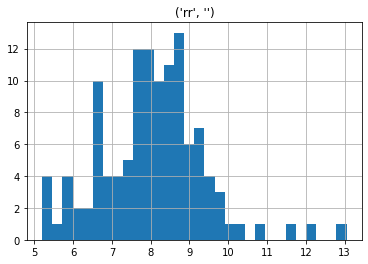

In [347]:
hist=runs[runs['Match_id'].str[0:4]==year].hist(column='rr',bins=30)

In [348]:
# write your code here. Feel free to add multiple cells as per your need


### **Question 12**
* Calculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Which team are top 3 teams by **%fast_innings**?
    * What insights do you have about the teams against %fast_innings?
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team (chose any of your choice), visualize the distribution of negative values and do the same for positive ones. 
  * Do you find skewness? If yes, how strong is it. Discuss the interesting cases.
* Are there instances where teams are making lots of runs at a very fast pace?
  * Create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
  * The **color** of the dots should correspond to the team color
  * Discuss the **insights** derived. Are there teams really dominating the run making?

---------------------------

In [362]:
r=runs[runs['rr']>6]
r.shape
r

Match_id Innings                    Team Runs_total              ovs  \
                                                        sum count              
0     2008041801       1   Kolkata Knight Riders        222   124  20.666667   
2     2008041901       1     Chennai Super Kings        240   124  20.666667   
3     2008041901       2         Kings XI Punjab        207   124  20.666667   
4     2008041902       1        Rajasthan Royals        129   122  20.333333   
5     2008041902       2        Delhi Daredevils        132    97  16.166667   
...          ...     ...                     ...        ...   ...        ...   
1271  2017051701       1     Sunrisers Hyderabad        128   122  20.333333   
1272  2017051701       2   Kolkata Knight Riders         48    35   5.833333   
1274  2017051901       2          Mumbai Indians        111    91  15.166667   
1275  2017052101       1          Mumbai Indians        129   125  20.833333   
1276  2017052101       2  Rising Pune Supergiant        128   123  20.500000   

             rr  
                 
0     10.741935  
2     11.612903  
3     10.016129  
4      6.344262  
5      8.164948  
...         ...  
1271   6.295082  
1272   8.228571  
1274   7.318681  
1275   6.192000  
1276   6.243902  

[1150 rows x 7 columns]

In [394]:
r1=r[['Team','Innings']].groupby('Team').agg('count').reset_index()
r1.head()

,Team,Innings
,,
0,Chennai Super Kings,120
1,Deccan Chargers,71
2,Delhi Daredevils,129
3,Gujarat Lions,29
4,Kings XI Punjab,134


In [395]:
r2=runs[['Team','Innings']].groupby('Team').agg('count').reset_index()
r2.head()

,Team,Innings
,,
0,Chennai Super Kings,131
1,Deccan Chargers,75
2,Delhi Daredevils,148
3,Gujarat Lions,31
4,Kings XI Punjab,149


In [396]:
r3=pd.merge(r1,r2,on=['Team'])

In [399]:
r3['perc']=r3['Innings_x']*100/r3['Innings_y']

In [401]:
r3.sort_values(by=['perc'],ascending=False)

,Team,Innings_x,Innings_y,perc
,,,,
10,Rising Pune Supergiant,16,16,100.000000
1,Deccan Chargers,71,75,94.666667
3,Gujarat Lions,29,31,93.548387
12,Royal Challengers Bangalore,143,153,93.464052
11,Rising Pune Supergiants,13,14,92.857143
13,Sunrisers Hyderabad,70,76,92.105263
0,Chennai Super Kings,120,131,91.603053
4,Kings XI Punjab,134,149,89.932886
6,Kolkata Knight Riders,133,148,89.864865


### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. (Hint : Box plots)
* Discuss your insights :
  * Is there a team which is really winning based on a higher run_rate maintained by them?
  * Think about a **statistical test of significance** which can help you evaluate the hypothesis mentioned in the 1st point.
    * **Reference 1 :** [Understanding the tests of significance](https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)
    * **Reference 2 :** [When to apply what?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
    * **Reference 3 :** [Understanding T-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)
  * **(Optional)**. Implement the test and explain your result

------------------

In [350]:
# write your code here. Feel free to add multiple cells as per your need


### **Question 14**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* Visualize the runs made by Virat Kohli in matches where his team played the **1st innings** (Hint : Use histograms)
* Visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. (Note : the 2 histograms should be plotted in the same figure)
* Interpret the histograms. Do they look cleanly **separated**?
* Create a **1X2** subplot : 
  * In subplot **(1,1)** plot the two histograms for the matches which his team won
  * In subplot **(1,2)** plot the two histograms for the matches which his team lost
  * **Discuss** your findings
    * Has Kohli been a great chaser **only** in matches won?
* Calculate Kohli's **run contribution(%)** for all matches played by him
  * Draw a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  * Draw a **scatter plot** showing **run_contribution(%)** on **X-axis** and **strike_rate** on **y-axis**. Define **color** of dots as : 
    * **Green :** For matches won
    * **Red :** For matches lost
  * Discuss your insights. Do you think he has been playing captain's innings?


In [351]:
# write your code here. Feel free to add multiple cells as per your need


### **Question 15 (Bonus Question)**
* Consider you are part of **team selection committee** for your team
* You are required to suggest **best nominations** for selection of **batsmen** during the team auctions
* Your team owner wants a **good mix** of batsmen who can exhibit the below **traits** :
  * Aggression
  * Consistency
  * Can hit at will
  * Pinch hitters
  * Sheet Anchors
  * Match finishers
* Use the data provided to you to create an exhaustive **list of metrics** which can demonstrate **quality** of a given batsman
* Apply **suitable machine learning** techniques to generate **clusters** of batsmen
* **Analyze** the clusters for **batting traits** and name them suitably
* **Discuss** your outcomes 

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
